In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize': (15, 10)})

Скачаем датасет с информацией о разных видах пива

In [3]:
df = pd.read_csv('datasets_673_1282_beers.csv')

Просмотрим информацию ою этом датасете

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


Видим, что в датасете есть много пропущенных значений, поэтому отбросим строки, где есть хотя бы одно пустое значение

In [5]:
df.dropna(inplace=True)

Обновим индексы, а также удалим ненужные столбцы

In [6]:
df.reset_index(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       1403 non-null   int64  
 1   Unnamed: 0  1403 non-null   int64  
 2   abv         1403 non-null   float64
 3   ibu         1403 non-null   float64
 4   id          1403 non-null   int64  
 5   name        1403 non-null   object 
 6   style       1403 non-null   object 
 7   brewery_id  1403 non-null   int64  
 8   ounces      1403 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 98.8+ KB


In [8]:
df.drop(columns=['index', 'Unnamed: 0'], inplace=True)

In [9]:
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
1,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4
2,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0
3,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0
4,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0


Проверим коррелируют ли друг с другом количество алкоголя в напитке и горечь пива

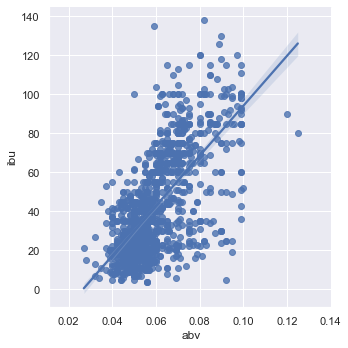

In [10]:
sns.lmplot(x='abv', y='ibu', data=df);

Видно, что в горечь увеличивается с увеличением количества спирта в напитке

Теперь посмотрим, в бутылки какого объема в основном разливают пиво.

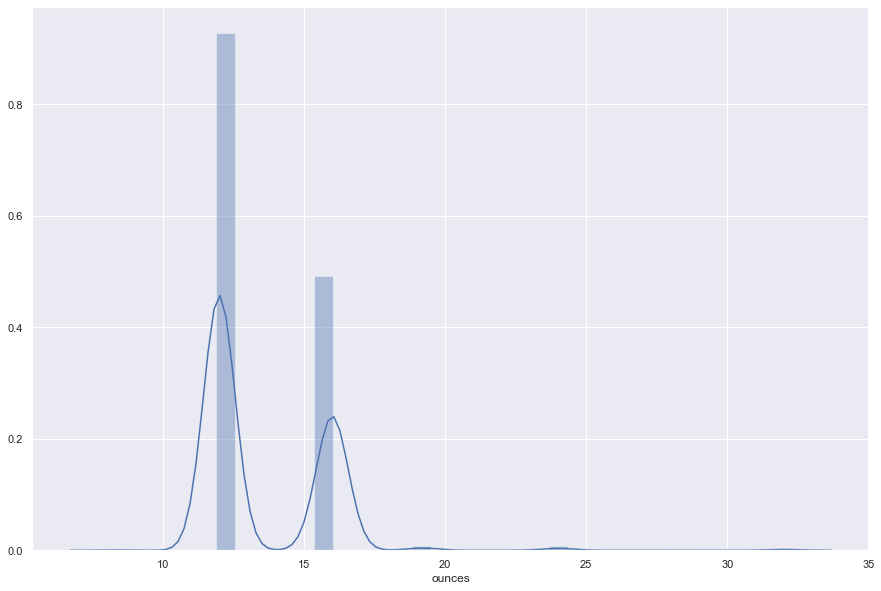

In [11]:
sns.distplot(df.ounces);

Видно, что чаще всего пиво делают в бутылках размером 12 и 16 унций.

Посмотрим точное количество

In [12]:
df.ounces.value_counts()

12.0    904
16.0    479
19.2      8
24.0      7
32.0      3
16.9      1
8.4       1
Name: ounces, dtype: int64

Выведем на экран и распределение сортов пива.

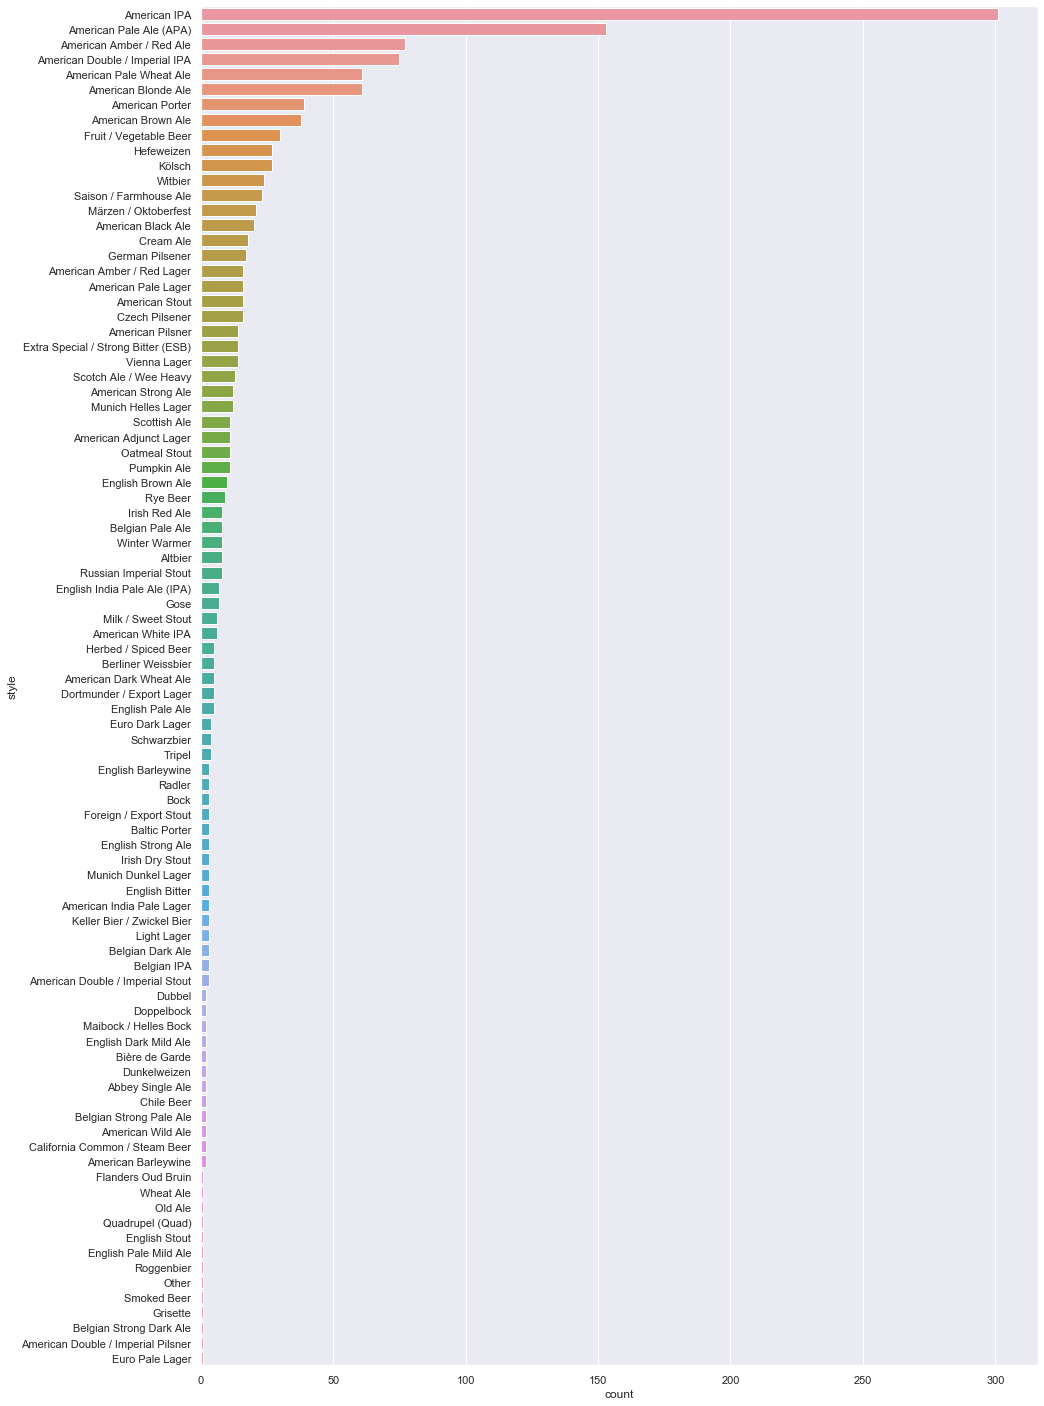

In [14]:
sns.set(rc={'figure.figsize': (15, 25)})
sns.countplot(y='style', data=df, order=df['style'].value_counts().index);

Не смотря на то, что сортов огромное множество, наиболее популярными два вида, а именно American IPA и American Pale Ale 